# Human Resource Dataset Analysis

### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset
In my case dataset is already on my local computer.

In [2]:
df = pd.read_csv('HRDataset.csv')

## Data Transformation and cleansing.

In [3]:
df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### Removing certain duplicate and unwanted columns from our dataset.
*There are attributes like MarritalStatusID, DeptID, GenderID and much more for which we have their actual values and so we don't need such attribute's IDs.
*Apart from that there are attributes like ZIP, HispanicLatino, DOB etc which won't help in our analysis.

In [4]:
df = df.drop(['EmpID','MarriedID','MaritalStatusID','GenderID','EmpStatusID','DeptID','FromDiversityJobFairID','HispanicLatino','DOB','Zip','PositionID','ManagerID','LastPerformanceReview_Date'], axis=1)

In [5]:
df.head()

,Employee_Name,PerfScoreID,Salary,Termd,Position,State,Sex,MaritalDesc,CitizenDesc,RaceDesc,...,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",4,62506,0,Production Technician I,MA,M,Single,US Citizen,White,...,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,0,1
1,"Ait Sidi, Karthikeyan",3,104437,1,Sr. DBA,MA,M,Married,US Citizen,White,...,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,0,17
2,"Akinkuolie, Sarah",3,64955,1,Production Technician II,MA,F,Married,US Citizen,White,...,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,0,3
3,"Alagbe,Trina",3,64991,0,Production Technician I,MA,F,Married,US Citizen,White,...,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,0,15
4,"Anderson, Carol",3,50825,1,Production Technician I,MA,F,Divorced,US Citizen,White,...,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,0,2


### Converting attributes containg dates into Pandas Date-time datatype.

In [6]:
df.DateofHire

0       7/5/2011
1      3/30/2015
2       7/5/2011
3       1/7/2008
4      7/11/2011
         ...    
306     7/7/2014
307     9/2/2008
308    4/10/2010
309    3/30/2015
310    9/29/2014
Name: DateofHire, Length: 311, dtype: object

#### We can see that `dtype` is of attribute DataofHire is `object` (which is assigned by default by pandas if it cannot recogonize the attribute datatype).

In [7]:
df['DateofHire'] = pd.to_datetime(df.DateofHire)
df['DateofTermination'] = pd.to_datetime(df.DateofTermination)

In [8]:
df.DateofHire

0     2011-07-05
1     2015-03-30
2     2011-07-05
3     2008-01-07
4     2011-07-11
         ...    
306   2014-07-07
307   2008-09-02
308   2010-04-10
309   2015-03-30
310   2014-09-29
Name: DateofHire, Length: 311, dtype: datetime64[ns]

#### And now the `dtype` of our attribute DateofHire has been changed to Pandas `datetime` datatype.

## Exploring and getting insights from Dataset.

In [9]:
#Total Departments present in our dataset
department = df.Department.unique()
department

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

The record Production contains unnecessary spacing so correcting that.

In [10]:
df.Department.replace("Production       ", "Production",inplace=True)

In [11]:
department = df.Department.unique()
department

array(['Production', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

In [12]:
#Different Job Positions.
positions = df.Position.unique()
positions.sort()
positions

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Analyst ', 'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object)

There's a typo for `Data Analyst` position in dataset. Some of the record contains unnecessary spacing because of which it is shown as a different position, so correcting that too.

In [26]:
df.Position.replace("Data Analyst ", "Data Analyst",inplace=True)
positions = df.Position.unique()
positions.sort()
positions

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object)

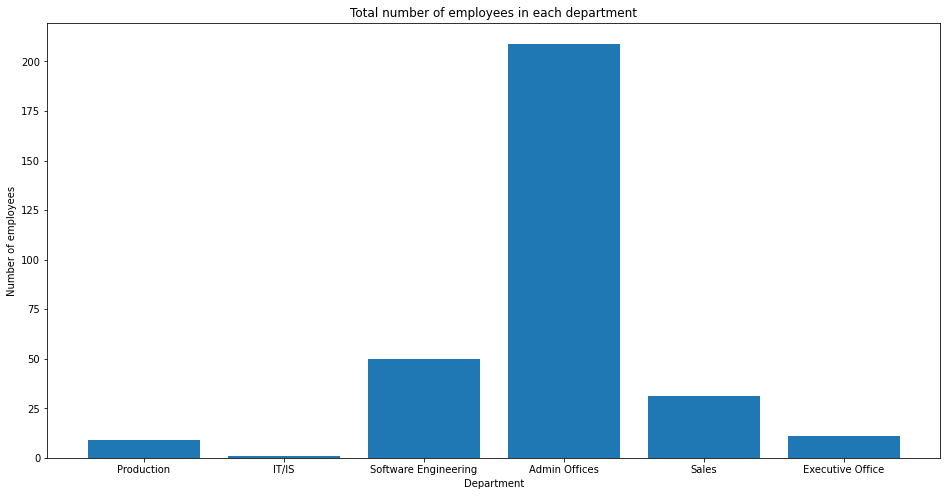

In [14]:
#Number of Empolyees in each Department 
employees_count = df.groupby('Department').Employee_Name.count()
plt.figure(figsize=(16,8))
plt.bar(department, employees_count)
plt.ylabel('Number of employees')
plt.xlabel('Department')
plt.title('Total number of employees in each department');

In [15]:
#Different recruitment sources
recruitment = df.RecruitmentSource.unique()
recruitment

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

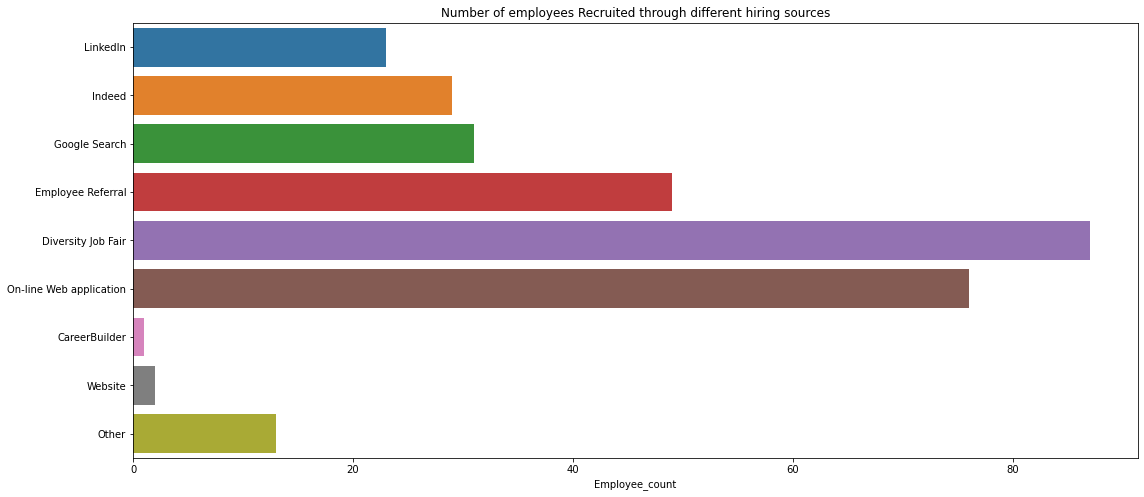

In [16]:
#Total Employees recruited through each sources. 
employees_count = df.groupby('RecruitmentSource').Employee_Name.count()
plt.figure(figsize=(18,8))
sns.barplot(x=employees_count,y=recruitment)
plt.xlabel('Employee_count')
plt.title('Number of employees Recruited through different hiring sources');

#### Q. What's the average Salary of employee in each Deaprtment?

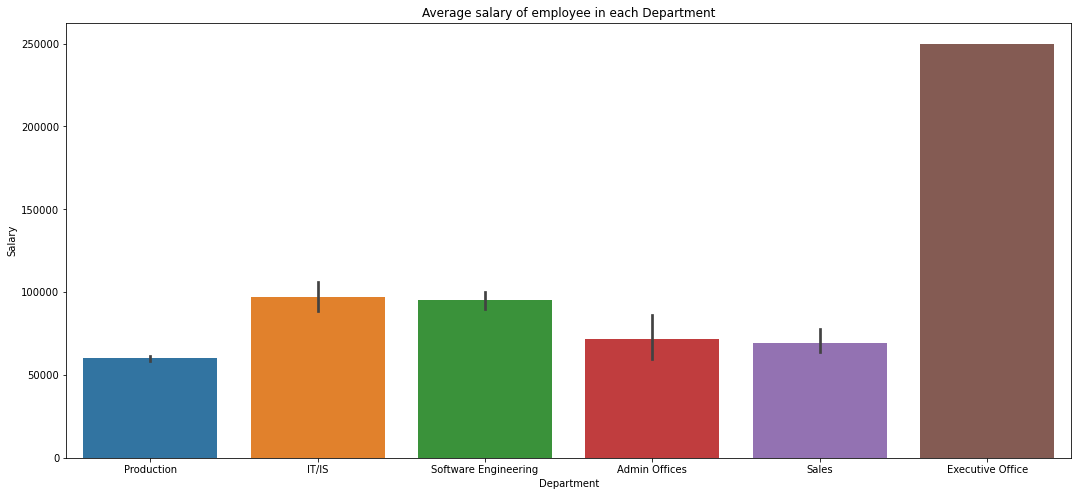

In [17]:
#Average Salary of employee.
plt.figure(figsize=(18,8))
sns.barplot(x='Department', y='Salary', data=df)
plt.title('Average salary of employee in each Department');

#### Q. Which employee performs well according to martial status?

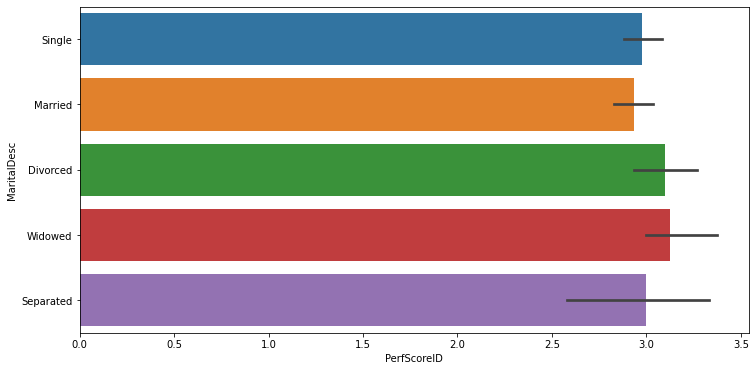

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.PerfScoreID,y=df.MaritalDesc, data=df);

#### Here we can see irrespective of Marital Status overall performance of employees is more or less the same.

#### Q. Which employee tends to take more leaves according to Martial Status? 

In [19]:
number_of_leaves = df.groupby('MaritalDesc').Absences.sum()
number_of_leaves

MaritalDesc
Divorced      300
Married      1355
Separated     103
Single       1339
Widowed        87
Name: Absences, dtype: int64

#### Hence, we can see that Married employee tends to take more  leaves.

#### Q.Which Department has the highest Employee Satisfaction.

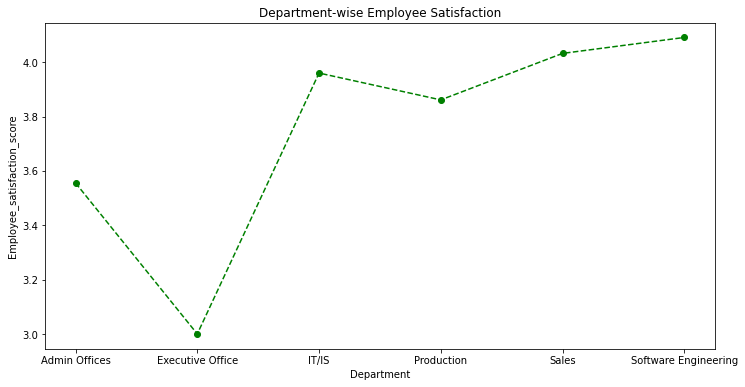

In [20]:
emp_satis = df.groupby('Department').EmpSatisfaction.mean()
plt.figure(figsize=(12,6))
plt.plot(emp_satis, 'o--g')
plt.ylabel('Employee_satisfaction_score')
plt.xlabel('Department')
plt.title('Department-wise Employee Satisfaction');

#### `Executive Office` Department has the lowest Employee Satisfaction and above we have seen average salary distribution in each department where Executive Office had the <i>highest average Salary</i>. Apart from that we can see that IT/IS, Production, Sales and Software Engineering Department's emplyees are completely Satisfied with their job. 

#### Q. Is there any Race Descrimination for non-white employees in terms of Salary? 

In [81]:
df.groupby('RaceDesc').Employee_Name.count()

RaceDesc
American Indian or Alaska Native      3
Asian                                29
Black or African American            80
Hispanic                              1
Two or more races                    11
White                               187
Name: Employee_Name, dtype: int64

In [22]:
df_non_white_employee = df[df.RaceDesc != 'White']
df_white_employee = df[df.RaceDesc == 'White']
non_white_employee_salary = df_non_white_employee.Salary.mean()
white_employee_salary = df_white_employee.Salary.mean()
print('Average Salary for white employee is ${:.2f} and average salary for non-white employee is ${:.2f}.'.format(white_employee_salary,non_white_employee_salary))

Average Salary for white employee is $67287.55 and average salary for non-white employee is $71634.37.


#### There's no Race Desrimination for non-white people in terms of salary and surprisingly average salary for non-white employee is more than of white employee.

#### Q. Are Female employees getting paid same as the Male employees?

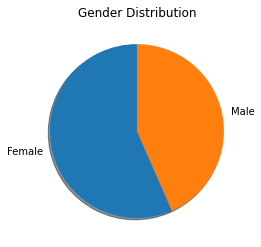

In [78]:
df.groupby('Sex').Employee_Name.count()
gender = ["Female", "Male"]
plt.pie(df.groupby('Sex').Employee_Name.count(), labels = gender, startangle = 90, shadow = True)
plt.title('Gender Distribution');

#### Female employees are more than male employees.

In [79]:
female_average_salary = df[df.Sex == 'F'].Salary.mean()
male_average_salary = df[df.Sex == 'M '].Salary.mean()
print("Average salary for male employee {:.2f} and average salary for female employee is {:.2f}".format(male_average_salary, female_average_salary))

Average salary for male employee 70629.40 and average salary for female employee is 67786.73


#### Average salary of female employee is less than that of male employee but it doesn't have any significant difference.

#### Q. Most of the non-white employees work on which position?

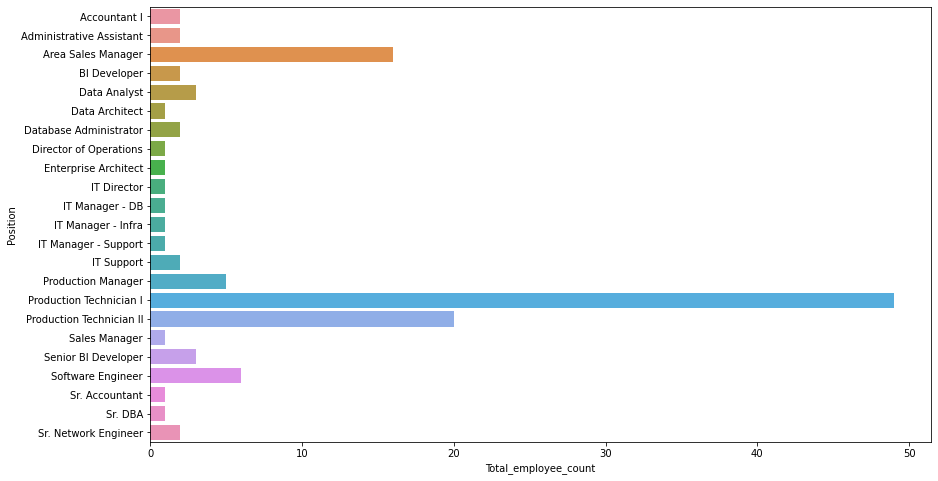

In [45]:
count_of_employee = df[df.RaceDesc != 'White'].groupby('Position').Employee_Name.count()
diff_pos = df_non_white_employee.Position.unique()
diff_pos.sort()
plt.figure(figsize=(14,8))
sns.barplot(x=count_of_employee, y=diff_pos)
plt.xlabel('Total_employee_count')
plt.ylabel('Position');

#### Most of the non-white employees work as `Production Technician I`.